[ 0.37041574 -0.05092066 -0.23544514 ... -0.6665152  -0.08542
 -0.44788747]


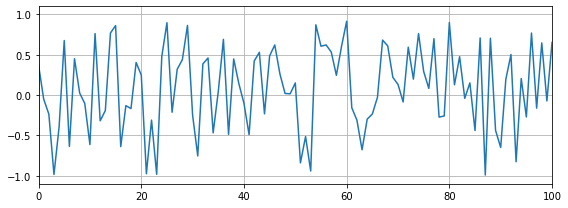

0
1
2
3
4
5
6
7
8
9
10
0
output: 0
1
output: 0
2
output: 0
3
output: 0
4
output: 0
5
output: 0
6
output: 0
7
output: 0
8
output: 0
9
output: 0
10
output: 0


In [41]:
from pynq import Overlay
from pynq import MMIO
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt
import array


fs = 50000
t = 3 # time in seconds
data = np.random.uniform(-1,1,fs*t) # t-seconds random samples between -1 and 1
print(data)
# scale to 16 bit for data transfer
data_scaled = np.int16(data/np.max(np.abs(data)) * (2**15)-1)

# plot data
plt.figure(figsize=(8,3))
plt.plot(data)
plt.xlim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()


ol = Overlay("./design_1_wrapper.bit") # designate a bitstream to be flashed to the FPGA
ol.download() # flash the FPGA
fir_filter = MMIO(0x40000000, 0x10000) # (IP_BASE_ADDRESS, ADDRESS_RANGE), told to us in Vivado

in_buffer = allocate(shape=(len(data),),dtype=np.int16)
out_buffer = allocate(shape=(len(data),),dtype=np.int32)
my_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

import numpy as np
my_numpy_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=np.int16)

i = 0
for x in range(11):
    fir_filter.write(0x20, my_array[i]) #
    i=i+1

import time
time.sleep(0.4)
i = 0
for x in range(11):
    print("output:", fir_filter.read(0x10)) # read corresponding output value from the output address of the fabric
    i=i+1

